In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

from PortfolioTracker.globalpath import global_path

In [2]:
## PRESENTATION LAYER
df_holdings = pd.read_csv(global_path.holdingstrands_gold_file_path)

# Convert datetime to date string
df_holdings["date"] = pd.to_datetime(df_holdings["date"])

# setting date column as index
df_holdings = df_holdings.sort_values(by="date").reset_index(drop=True)

df_holdings["pnl"] = df_holdings["close"] - df_holdings["holding"]
df_holdings["pnl_percentage"] = (
    df_holdings["pnl"] / df_holdings["holding"]
) * 100

# Calculate the 50-day moving average of 'close_amount'
df_holdings["moving_avg"] = df_holdings["close"].rolling(window=30).mean()

df_holdings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1579 non-null   datetime64[ns]
 1   open            1579 non-null   float64       
 2   high            1579 non-null   float64       
 3   low             1579 non-null   float64       
 4   close           1579 non-null   float64       
 5   holding         1579 non-null   float64       
 6   pnl             1579 non-null   float64       
 7   pnl_percentage  1579 non-null   float64       
 8   moving_avg      1550 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 111.2 KB


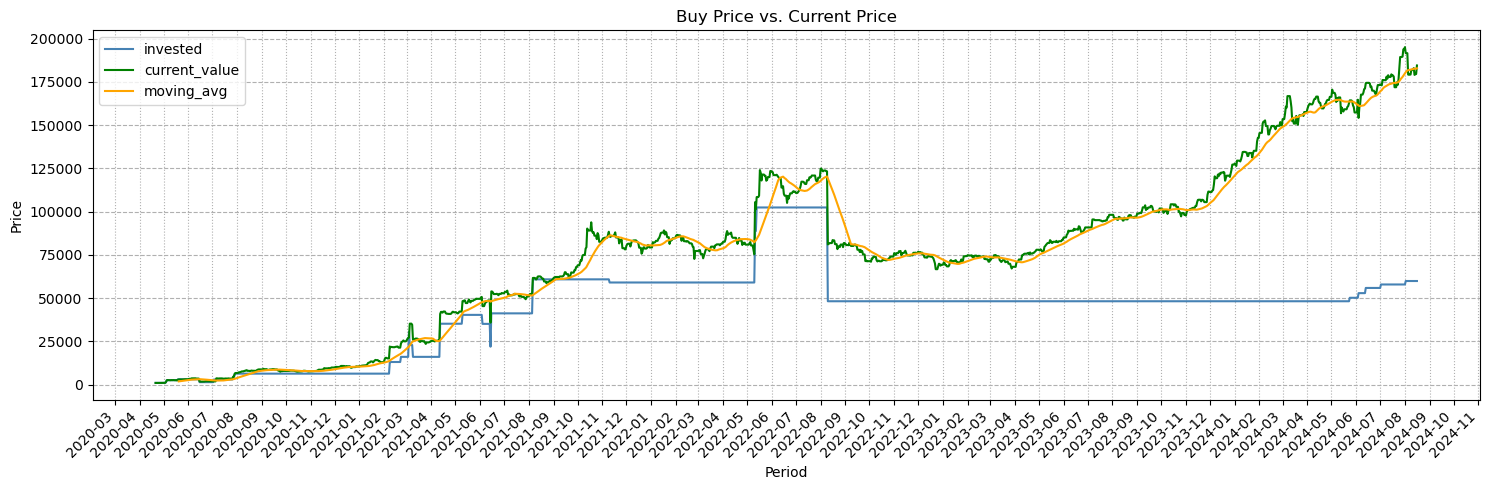

In [3]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))

# plot individual lines
ax.plot(
    df_holdings["date"],
    df_holdings["holding"],
    label="invested",
    color="steelblue",
)
ax.plot(
    df_holdings["date"],
    df_holdings["close"],
    label="current_value",
    color="green",
)

ax.plot(
    df_holdings["date"],
    df_holdings["moving_avg"],
    label="moving_avg",
    color="orange",
)

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Price")
plt.xlabel("Period")
plt.title("Buy Price vs. Current Price")
ax.legend()

# display plot
plt.tight_layout()
plt.show()

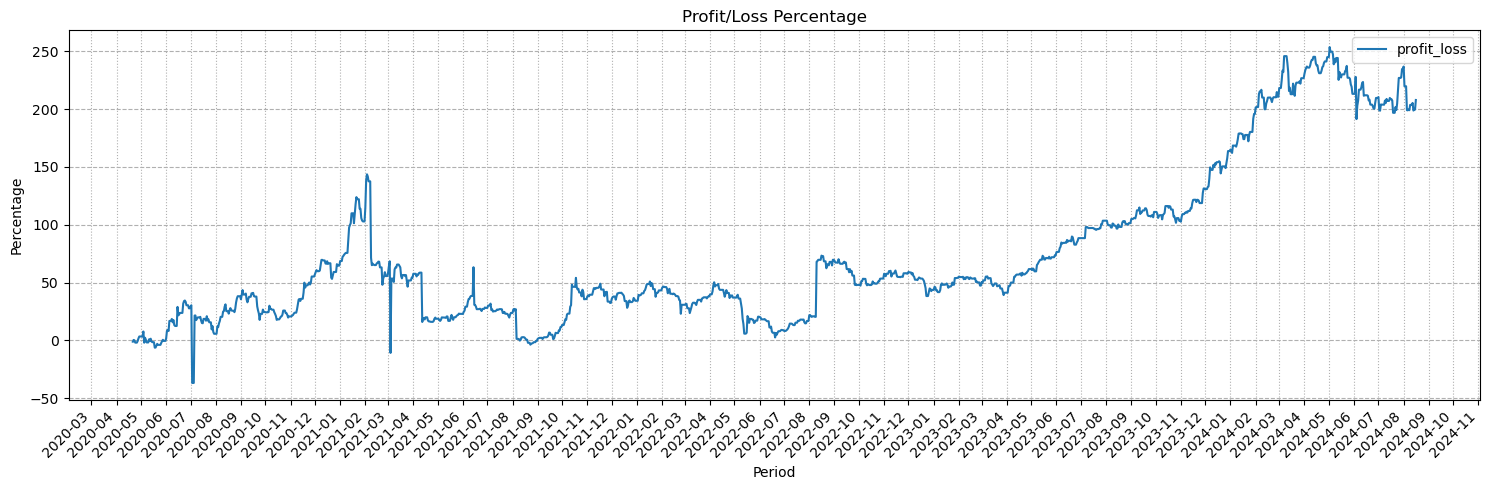

In [4]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df_holdings["date"], df_holdings["pnl_percentage"], label="profit_loss")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Percentage")
plt.xlabel("Period")
plt.title("Profit/Loss Percentage")
ax.legend()

# display plot
plt.tight_layout()
plt.show()